In [1]:
import sys

sys.path.append('../src')
from utils import *
from config import *
from analysis import *

In [2]:
ee.Authenticate()
ee.Initialize(project='dse-staff')
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


In [11]:
sites = ee.FeatureCollection("projects/dse-staff/assets/movement_metadata").geometry().buffer(50000) #50km
pas = filter_protected_areas()
filtered = pas.filterBounds(sites)

In [12]:
Map = geemap.Map()
Map.addLayer(filtered, {'color': 'red'}, 'Intersecting Protected Areas')
Map.addLayer(sites, {'color': 'green'}, 'Points')
Map.centerObject(sites, 5) 
Map

Map(center=[44.66445758721702, -2.0012849388588116], controls=(WidgetControl(options=['position', 'transparent…

In [3]:
exp_res = ExportResults()
viz = Visualization()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = exp_res.combine_gcs_csvs(bucket_name='dse-staff',folder_path='protected_areas/movement')

# Calculate edge and reformat columns
df['edge_index'] = df['boundary_x_mean'] / df['buffer_x_mean']
df['WDPA_PID'] = df['WDPA_PID'].astype(str)
df['year'] = df['year'].astype(str)

data = pd.DataFrame(df)
data.to_csv('/workspace/output/edge_ndvi_2016_851pas.csv', index=False)

In [5]:
data = pd.read_csv('/workspace/output/edge_ndvi_2016_851pas.csv')

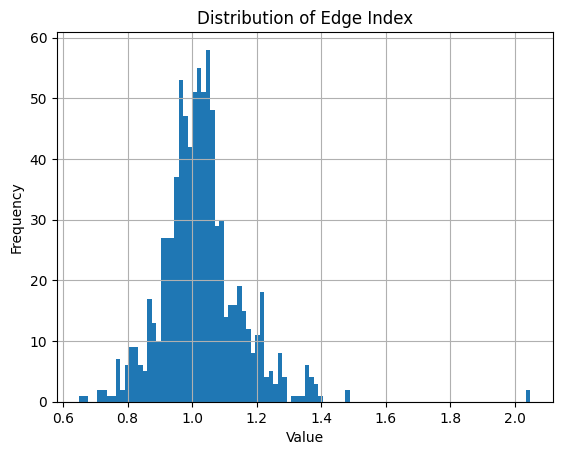

In [9]:
data['edge_index'].hist(bins=100) 
plt.title('Distribution of Edge Index')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
len(data['WDPA_PID'].unique())

848